In [202]:
## Run this cell to test it
#!git clone https://github.com/ssanderson/pydata-toolbox

fatal: destination path 'pydata-toolbox' already exists and is not an empty directory.


In [203]:
pip install -U fortran-magic

In [204]:
%reload_ext fortranmagic

/usr/local/lib/python3.7/dist-packages/fortranmagic.py:147: UserWarning: get_ipython_cache_dir has moved to the IPython.paths module since IPython 4.0.
  self._lib_dir = os.path.join(get_ipython_cache_dir(), 'fortran')


In [ ]:
import py_compile

In [ ]:
%matplotlib inline
%load_ext fortranmagic

import sys; sys.path.append('..')

import pandas as pd
import numpy as np
import matplotlib as mpl
import matplotlib.pyplot as plt
import seaborn as sns

mpl.rc('figure', figsize=(12, 7))

ran_the_first_cell = True

jan2017 = pd.to_datetime(['2017-01-03 00:00:00+00:00',
 '2017-01-04 00:00:00+00:00',
 '2017-01-05 00:00:00+00:00',
 '2017-01-06 00:00:00+00:00',
 '2017-01-09 00:00:00+00:00',
 '2017-01-10 00:00:00+00:00',
 '2017-01-11 00:00:00+00:00',
 '2017-01-12 00:00:00+00:00',
 '2017-01-13 00:00:00+00:00',
 '2017-01-17 00:00:00+00:00',
 '2017-01-18 00:00:00+00:00',
 '2017-01-19 00:00:00+00:00',
 '2017-01-20 00:00:00+00:00',
 '2017-01-23 00:00:00+00:00',
 '2017-01-24 00:00:00+00:00',
 '2017-01-25 00:00:00+00:00',
 '2017-01-26 00:00:00+00:00',
 '2017-01-27 00:00:00+00:00',
 '2017-01-30 00:00:00+00:00',
 '2017-01-31 00:00:00+00:00',
 '2017-02-01 00:00:00+00:00'])
calendar = jan2017.values.astype('datetime64[D]')

event_dates = pd.to_datetime(['2017-01-06 00:00:00+00:00', 
                             '2017-01-07 00:00:00+00:00', 
                             '2017-01-08 00:00:00+00:00']).values.astype('datetime64[D]')
event_values = np.array([10, 15, 20])

The fortranmagic extension is already loaded. To reload it, use:
  %reload_ext fortranmagic


<center>
  <h1>The PyData Toolbox</h1>
  <h3>Scott Sanderson (Twitter: @scottbsanderson, GitHub: ssanderson)</h3>
  <h3><a href="https://github.com/ssanderson/pydata-toolbox">https://github.com/ssanderson/pydata-toolbox</a></h3>
</center>

# About Me:

<img src="images/me.jpg" alt="Drawing" style="width: 300px;"/>

- Senior Engineer at [Quantopian](www.quantopian.com)
- Background in Mathematics and Philosophy
- **Twitter:** [@scottbsanderson](https://twitter.com/scottbsanderson)
- **GitHub:** [ssanderson](github.com/ssanderson)

## Outline

- Built-in Data Structures
- Numpy `array`
- Pandas `Series`/`DataFrame`
- Plotting and "Real-World" Analyses

# Data Structures

> Rule 5. Data dominates. If you've chosen the right data structures and organized things well, the algorithms
will almost always be self-evident. Data structures, not algorithms, are central to programming.

- *Notes on Programming in C*, by Rob Pike.

# Lists

In [ ]:
assert ran_the_first_cell, "Oh noes!"

In [ ]:
l = [1, 'two', 3.0, 4, 5.0, "six"]
l

[1, 'two', 3.0, 4, 5.0, 'six']

In [ ]:
#ejemplo
l1 = [1,2,3,'4','5',"seis",7.8,False]
l1

[1, 2, 3, '4', '5', 'seis', 7.8, False]

In [ ]:
# Lists can be indexed like C-style arrays.
first = l[0]
second = l[1]
print("first:", first)
print("second:", second)

first: 1
second: two


In [ ]:
#ejemplo
a = l1[2]
b = l1[3]
print("third:", a)
print("fourth:", b)

third: 3
fourth: 4


In [ ]:
# Negative indexing gives elements relative to the end of the list.
last = l[-1]
penultimate = l[-2]
print("last:", last)
print("second to last:", penultimate)

last: six
second to last: 5.0


In [ ]:
#ejemplo
first = l1[-len(l1)]
ult = l1[-1]
print('primero: ',first)
print('ultimo: ',ult)

primero:  1
ultimo:  False


In [ ]:
# Lists can also be sliced, which makes a copy of elements between 
# start (inclusive) and stop (exclusive)
sublist = l[1:3]
sublist

['two', 3.0]

In [ ]:
#ejemplo
sl1 = l1[-len(l1):-2]
sl1

[1, 2, 3, '4', '5', 'seis']

In [ ]:
# l[:N] is equivalent to l[0:N].
first_three = l[:3]
first_three

[1, 'two', 3.0]

In [ ]:
#ejemplo
sl2 = l1[:5]
sl2

[1, 2, 3, '4', '5']

In [ ]:
# l[3:] is equivalent to l[3:len(l)].
after_three = l[3:]
after_three

[4, 5.0, 'six']

In [ ]:
#ejemplo
sl3 = l1[4:]
sl3

['5', 'seis', 7.8, False]

In [ ]:
# There's also a third parameter, "step", which gets every Nth element.
l = ['a', 'b', 'c', 'd', 'e', 'f', 'g','h']
l[1:7:2]

['b', 'd', 'f']

In [ ]:
#ejemplo
sl4 = l1[::3]
sl4

[1, '4', 7.8]

In [ ]:
# This is a cute way to reverse a list.
l[::-1]

['h', 'g', 'f', 'e', 'd', 'c', 'b', 'a']

In [ ]:
#ejemplo
l1[::-1]

[False, 7.8, 'seis', '5', '4', 3, 2, 1]

In [ ]:
# Lists can be grown efficiently (in O(1) amortized time).
l = [1, 2, 3, 4, 5]
print("Before:", l)
l.append('six')
print("After:", l)

Before: [1, 2, 3, 4, 5]
After: [1, 2, 3, 4, 5, 'six']


In [ ]:
#ejemplo
l1 = [1,2,3,'4','5',"seis",7.8,False]
print("before: ", l1)
l1.append('append')
l1.append('append')
l1.append('append')
l1.append('append')
print("after: ", l1)

before:  [1, 2, 3, '4', '5', 'seis', 7.8, False]
after:  [1, 2, 3, '4', '5', 'seis', 7.8, False, 'append', 'append', 'append', 'append']


In [ ]:
# Comprehensions let us perform elementwise computations.
l = [1, 2, 3, 4, 5]
[x * 2 for x in l]

[2, 4, 6, 8, 10]

In [ ]:
#ejemplo
l1 = [1,2,3,'4','5',"seis",7.8,False]
[x * 2 for x in l1]

[2, 4, 6, '44', '55', 'seisseis', 15.6, 0]

## Review: Python Lists

- Zero-indexed sequence of arbitrary Python values.
- Slicing syntax: `l[start:stop:step]` copies elements at regular intervals from `start` to `stop`.
- Efficient (`O(1)`) appends and removes from end.
- Comprehension syntax: `[f(x) for x in l if cond(x)]`.

# Dictionaries

In [ ]:
# Dictionaries are key-value mappings.
philosophers = {'David': 'Hume', 'Immanuel': 'Kant', 'Bertrand': 'Russell'}
philosophers

{'Bertrand': 'Russell', 'David': 'Hume', 'Immanuel': 'Kant'}

In [ ]:
#ejemplo
d1 = {1:'a',2:'b',3:'c',4:'d',5:'e'}
d1

{1: 'a', 2: 'b', 3: 'c', 4: 'd', 5: 'e'}

In [ ]:
# Like lists, dictionaries are size-mutable.
philosophers['Ludwig'] = 'Wittgenstein'
philosophers

{'Bertrand': 'Russell',
 'David': 'Hume',
 'Immanuel': 'Kant',
 'Ludwig': 'Wittgenstein'}

In [ ]:
#ejemplo
d1[6] = 'f'
d1

{1: 'a', 2: 'b', 3: 'c', 4: 'd', 5: 'e', 6: 'f'}

In [ ]:
del philosophers['David']
philosophers

{'Bertrand': 'Russell', 'Immanuel': 'Kant', 'Ludwig': 'Wittgenstein'}

In [ ]:
#ejemplo
del d1[1]
d1

{2: 'b', 3: 'c', 4: 'd', 5: 'e', 6: 'f'}

In [ ]:
# No slicing.
philosophers['Bertrand':'Immanuel']

TypeError: ignored

In [ ]:
#ejemplo
d1[2:3]

TypeError: ignored

## Review: Python Dictionaries

- Unordered key-value mapping from (almost) arbitrary keys to arbitrary values.
- Efficient (`O(1)`) lookup, insertion, and deletion.
- No slicing (would require a notion of order).

<center><img src="images/pacino.gif" alt="Drawing" style="width: 100%;"/></center>


In [ ]:
# Suppose we have some matrices...
a = [[1, 2, 3],
     [2, 3, 4],
     [5, 6, 7],
     [1, 1, 1]]

b = [[1, 2, 3, 4],
     [2, 3, 4, 5]]

In [ ]:
#ejemplo
aa = [[43,56,123],
      [12,34,56]]
bb = [[1,0,0],[0,1,0],[0,0,1]]

In [ ]:
def matmul(A, B):
    """Multiply matrix A by matrix B."""
    rows_out = len(A)
    cols_out = len(B[0])
    out = [[0 for col in range(cols_out)] for row in range(rows_out)]
    
    for i in range(rows_out):
        for j in range(cols_out):
            for k in range(len(B)):
                out[i][j] += A[i][k] * B[k][j]
    return out

<center><img src="images/gross.gif" alt="Drawing" style="width: 50%;"/></center>


In [ ]:
%%time

matmul(a, b)

CPU times: user 35 µs, sys: 5 µs, total: 40 µs
Wall time: 45.5 µs


[[5, 8, 11, 14], [8, 13, 18, 23], [17, 28, 39, 50], [3, 5, 7, 9]]

In [ ]:
#ejemplo
%%time

matmul(aa,bb)

CPU times: user 32 µs, sys: 0 ns, total: 32 µs
Wall time: 35.3 µs


[[43, 56, 123], [12, 34, 56]]

In [ ]:
import random
def random_matrix(m, n):
    out = []
    for row in range(m):
        out.append([random.random() for _ in range(n)])
    return out

randm = random_matrix(2, 3)
randm

[[0.47739875908072515, 0.9120898366884758, 0.26135588975975843],
 [0.8898144903938091, 0.7930465929451869, 0.3388936365635258]]

In [ ]:
%%time
randa = random_matrix(600, 100)
randb = random_matrix(100, 600)
x = matmul(randa, randb)

CPU times: user 10 s, sys: 1.61 ms, total: 10 s
Wall time: 10.1 s


In [ ]:
#ejemplo
%%time
aaa = random_matrix(123,456)
bbb = random_matrix(456,789)
ccc = matmul(aaa,bbb)

CPU times: user 13.5 s, sys: 3.22 ms, total: 13.5 s
Wall time: 13.5 s


In [ ]:
# Maybe that's not that bad?  Let's try a simpler case.
def python_dot_product(xs, ys):
    return sum(x * y for x, y in zip(xs, ys))

In [ ]:
%%fortran
subroutine fortran_dot_product(xs, ys, result)
    double precision, intent(in) :: xs(:)
    double precision, intent(in) :: ys(:)
    double precision, intent(out) :: result
    
    result = sum(xs * ys)
end

In [ ]:
list_data = [float(i) for i in range(100000)]
array_data = np.array(list_data)

In [ ]:
#ejemplo
ld = [float(i)*random.random() for i in range(1000000)]
ad = np.array(ld)

In [ ]:
%%time
python_dot_product(list_data, list_data)

CPU times: user 11.4 ms, sys: 0 ns, total: 11.4 ms
Wall time: 12.1 ms


333328333350000.0

In [ ]:
#ejemplo
%%time
python_dot_product(ld,ld)

CPU times: user 94.4 ms, sys: 0 ns, total: 94.4 ms
Wall time: 101 ms


1.1101948475037453e+17

In [ ]:
%%time
fortran_dot_product(array_data, array_data)

CPU times: user 208 µs, sys: 0 ns, total: 208 µs
Wall time: 247 µs


333328333350000.0

In [ ]:
#ejemplo
%%time
fortran_dot_product(ad,ad)

CPU times: user 1.86 ms, sys: 81 µs, total: 1.94 ms
Wall time: 2.37 ms


1.1101948475037453e+17

<center><img src="images/sloth.gif" alt="Drawing" style="width: 1080px;"/></center>


## Why is the Python Version so Much Slower?

In [ ]:
# Dynamic typing.
def mul_elemwise(xs, ys):
    return [x * y for x, y in zip(xs, ys)]

mul_elemwise([1, 2, 3, 4], [1, 2 + 0j, 3.0, 'four'])
#[type(x) for x in _]

[1, (4+0j), 9.0, 'fourfourfourfour']

In [ ]:
#ejemplo
mul_elemwise([1,2,3,4],['a',"b",True,3.4])

['a', 'bb', 3, 13.6]

In [ ]:
# Interpretation overhead.
source_code = 'a + b * c'
bytecode = compile(source_code, '', 'eval')
import dis; dis.dis(bytecode)

  1           0 LOAD_NAME                0 (a)
              2 LOAD_NAME                1 (b)
              4 LOAD_NAME                2 (c)
              6 BINARY_MULTIPLY
              8 BINARY_ADD
             10 RETURN_VALUE


In [ ]:
#ejemplo
s_c = '((True >= \'True\') & ((a * c /d) != a))'
b_c = compile(s_c, '','eval')
dis.dis(b_c)

  1           0 LOAD_CONST               0 (True)
              2 LOAD_CONST               1 ('True')
              4 COMPARE_OP               5 (>=)
              6 LOAD_NAME                0 (a)
              8 LOAD_NAME                1 (c)
             10 BINARY_MULTIPLY
             12 LOAD_NAME                2 (d)
             14 BINARY_TRUE_DIVIDE
             16 LOAD_NAME                0 (a)
             18 COMPARE_OP               3 (!=)
             20 BINARY_AND
             22 RETURN_VALUE


## Why is the Python Version so Slow?
- Dynamic typing means that every single operation requires dispatching on the input type.
- Having an interpreter means that every instruction is fetched and dispatched at runtime.
- Other overheads:
  - Arbitrary-size integers.
  - Reference-counted garbage collection.

> This is the paradox that we have to work with when we're doing scientific or numerically-intensive Python. What makes Python fast for development -- this high-level, interpreted, and dynamically-typed aspect of the language -- is exactly what makes it slow for code execution.

- Jake VanderPlas, [*Losing Your Loops: Fast Numerical Computing with NumPy*](https://www.youtube.com/watch?v=EEUXKG97YRw)

# What Do We Do?

<center><img src="images/runaway.gif" alt="Drawing" style="width: 50%;"/></center>

<center><img src="images/thisisfine.gif" alt="Drawing" style="width: 1080px;"/></center>

- Python is slow for numerical computation because it performs dynamic dispatch on every operation we perform...

- ...but often, we just want to do the same thing over and over in a loop!

- If we don't need Python's dynamicism, we don't want to pay (much) for it.

- **Idea:** Dispatch **once per operation** instead of **once per element**.

In [ ]:
import numpy as np

data = np.array([1, 2, 3, 4])
data

array([1, 2, 3, 4])

In [ ]:
#ejemplo
data1 = np.array([1.1,2.2,3.3,4.4])
data1

array([1.1, 2.2, 3.3, 4.4])

In [ ]:
data + data

array([2, 4, 6, 8])

In [ ]:
data1 + data1

array([2.2, 4.4, 6.6, 8.8])

In [ ]:
%%time
# Naive dot product
(array_data * array_data).sum()

CPU times: user 763 µs, sys: 0 ns, total: 763 µs
Wall time: 774 µs


333328333350000.0

In [ ]:
#ejemplo
%%time
(ad * ad).sum()

CPU times: user 3.04 ms, sys: 936 µs, total: 3.97 ms
Wall time: 3.37 ms


1.1101948475037349e+17

In [ ]:
%%time
# Built-in dot product.
array_data.dot(array_data)

CPU times: user 1.03 ms, sys: 0 ns, total: 1.03 ms
Wall time: 928 µs


333328333350000.0

In [ ]:
#ejemplo
%%time
ad.dot(ad)

CPU times: user 2.91 ms, sys: 0 ns, total: 2.91 ms
Wall time: 1.88 ms


1.1101948475037342e+17

In [ ]:
%%time
fortran_dot_product(array_data, array_data)

CPU times: user 223 µs, sys: 23 µs, total: 246 µs
Wall time: 257 µs


333328333350000.0

In [ ]:
#ejemplo
%%time
fortran_dot_product(ad,ad)

CPU times: user 1.71 ms, sys: 0 ns, total: 1.71 ms
Wall time: 1.82 ms


1.1101948475037453e+17

In [ ]:
# Numpy won't allow us to write a string into an int array.
data[0] = "foo"

ValueError: ignored

In [ ]:
#ejemplo
data1[0] = 'fanfare'

ValueError: ignored

In [ ]:
# We also can't grow an array once it's created.
data.append(3)

AttributeError: ignored

In [ ]:
#ejemplo
data1.append(5.5)

AttributeError: ignored

In [ ]:
# We **can** reshape an array though.
two_by_two = data.reshape(2, 2)
two_by_two

array([[1, 2],
       [3, 4]])

In [ ]:
#ejemplo
onexfour = data1.reshape(4,1)
onexfour

array([[1.1],
       [2.2],
       [3.3],
       [4.4]])

Numpy arrays are:

- Fixed-type

- Size-immutable

- Multi-dimensional

- Fast\*

\* If you use them correctly.

# What's in an Array?

In [ ]:
arr = np.array([1, 2, 3, 4, 5, 6], dtype='int16').reshape(2, 3)
print("Array:\n", arr, sep='')
print("===========")
print("DType:", arr.dtype)
print("Shape:", arr.shape)
print("Strides:", arr.strides)
print("Data:", arr.data.tobytes())

Array:
[[1 2 3]
 [4 5 6]]
DType: int16
Shape: (2, 3)
Strides: (6, 2)
Data: b'\x01\x00\x02\x00\x03\x00\x04\x00\x05\x00\x06\x00'


In [ ]:
#ejemplo
arr2 = np.array([61, 52, 43, 34, 25, 16], dtype='int16').reshape(2, 3)
print("Array:\n", arr2, sep='')
print("===========")
print("DType:", arr2.dtype)
print("Shape:", arr2.shape)
print("Strides:", arr2.strides)
print("Data:", arr2.data.tobytes())

Array:
[[61 52 43]
 [34 25 16]]
DType: int16
Shape: (2, 3)
Strides: (6, 2)
Data: b'=\x004\x00+\x00"\x00\x19\x00\x10\x00'


# Core Operations

- Vectorized **ufuncs** for elementwise operations.
- Fancy indexing and masking for selection and filtering.
- Aggregations across axes.
- Broadcasting

# UFuncs

UFuncs (universal functions) are functions that operate elementwise on one or more arrays.

In [ ]:
data = np.arange(15).reshape(3, 5)
data

array([[ 0,  1,  2,  3,  4],
       [ 5,  6,  7,  8,  9],
       [10, 11, 12, 13, 14]])

In [ ]:
#ejemplo
data1 = np.arange(5,30).reshape(5,5)
data1

array([[ 5,  6,  7,  8,  9],
       [10, 11, 12, 13, 14],
       [15, 16, 17, 18, 19],
       [20, 21, 22, 23, 24],
       [25, 26, 27, 28, 29]])

In [ ]:
# Binary operators.
data * data

array([[  0,   1,   4,   9,  16],
       [ 25,  36,  49,  64,  81],
       [100, 121, 144, 169, 196]])

In [ ]:
#ejemplo
data1 * data1

array([[ 25,  36,  49,  64,  81],
       [100, 121, 144, 169, 196],
       [225, 256, 289, 324, 361],
       [400, 441, 484, 529, 576],
       [625, 676, 729, 784, 841]])

In [ ]:
# Unary functions.
np.sqrt(data)

array([[0.        , 1.        , 1.41421356, 1.73205081, 2.        ],
       [2.23606798, 2.44948974, 2.64575131, 2.82842712, 3.        ],
       [3.16227766, 3.31662479, 3.46410162, 3.60555128, 3.74165739]])

In [ ]:
#ejemplo
np.square(data1)

array([[ 25,  36,  49,  64,  81],
       [100, 121, 144, 169, 196],
       [225, 256, 289, 324, 361],
       [400, 441, 484, 529, 576],
       [625, 676, 729, 784, 841]])

In [ ]:
# Comparison operations
(data % 3) == 0

array([[ True, False, False,  True, False],
       [False,  True, False, False,  True],
       [False, False,  True, False, False]])

In [ ]:
#ejemplo
(data1 % 5) >= 3

array([[False, False, False,  True,  True],
       [False, False, False,  True,  True],
       [False, False, False,  True,  True],
       [False, False, False,  True,  True],
       [False, False, False,  True,  True]])

In [ ]:
# Boolean combinators.
((data % 2) == 0) & ((data % 3) == 0)

array([[ True, False, False, False, False],
       [False,  True, False, False, False],
       [False, False,  True, False, False]])

In [ ]:
#ejemplo
((data1 % 5) >= 3) | ((data1 % 5) <= 1)

array([[ True,  True, False,  True,  True],
       [ True,  True, False,  True,  True],
       [ True,  True, False,  True,  True],
       [ True,  True, False,  True,  True],
       [ True,  True, False,  True,  True]])

In [ ]:
# as of python 3.5, @ is matrix-multiply
data @ data.T

array([[ 30,  80, 130],
       [ 80, 255, 430],
       [130, 430, 730]])

In [ ]:
data1 @ data1.T

array([[ 255,  430,  605,  780,  955],
       [ 430,  730, 1030, 1330, 1630],
       [ 605, 1030, 1455, 1880, 2305],
       [ 780, 1330, 1880, 2430, 2980],
       [ 955, 1630, 2305, 2980, 3655]])

# UFuncs Review

- UFuncs provide efficient elementwise operations applied across one or more arrays.
- Arithmetic Operators (`+`, `*`, `/`)
- Comparisons (`==`, `>`, `!=`)
- Boolean Operators (`&`, `|`, `^`)
- Trigonometric Functions (`sin`, `cos`)
- Transcendental Functions (`exp`, `log`)

# Selections

We often want to perform an operation on just a subset of our data.

In [ ]:
sines = np.sin(np.linspace(0, 3.14, 10))
cosines = np.cos(np.linspace(0, 3.14, 10))
sines

array([0.        , 0.34185385, 0.64251645, 0.86575984, 0.98468459,
       0.98496101, 0.8665558 , 0.64373604, 0.34335012, 0.00159265])

In [ ]:
#ejemplo
sines1 = np.sin(np.linspace(0, 2*3.14, 10))
cosines1 = np.cos(np.linspace(0, 2*3.14, 10))
sines1

array([ 0.        ,  0.64251645,  0.98468459,  0.8665558 ,  0.34335012,
       -0.34035671, -0.86496168, -0.98523494, -0.644954  , -0.0031853 ])

In [ ]:
# Slicing works with the same semantics as Python lists.
sines[0]

0.0

In [ ]:
#ejemplo
sines1[4]

0.3433501155464075

In [ ]:
sines[:3]  # First three elements  

array([0.        , 0.34185385, 0.64251645])

In [ ]:
#ejemplo
sines[:6]

array([0.        , 0.34185385, 0.64251645, 0.86575984, 0.98468459,
       0.98496101])

In [ ]:
sines[5:]  # Elements from 5 on.

array([0.98496101, 0.8665558 , 0.64373604, 0.34335012, 0.00159265])

In [ ]:
#ejemplo
sines1[2:]

array([ 0.98468459,  0.8665558 ,  0.34335012, -0.34035671, -0.86496168,
       -0.98523494, -0.644954  , -0.0031853 ])

In [ ]:
sines[::2]  # Every other element.

array([0.        , 0.64251645, 0.98468459, 0.8665558 , 0.34335012])

In [ ]:
sines1[::4]

array([ 0.        ,  0.34335012, -0.644954  ])

In [ ]:
# More interesting: we can index with boolean arrays to filter by a predicate.
print("sines:\n", sines)
print("sines > 0.5:\n", sines > 0.5)
print("sines[sines > 0.5]:\n", sines[sines > 0.5])

sines:
 [0.         0.34185385 0.64251645 0.86575984 0.98468459 0.98496101
 0.8665558  0.64373604 0.34335012 0.00159265]
sines > 0.5:
 [False False  True  True  True  True  True  True False False]
sines[sines > 0.5]:
 [0.64251645 0.86575984 0.98468459 0.98496101 0.8665558  0.64373604]


In [ ]:
#ejemplo
print(sines1)
print(sines1[sines1 < 0])

[ 0.          0.64251645  0.98468459  0.8665558   0.34335012 -0.34035671
 -0.86496168 -0.98523494 -0.644954   -0.0031853 ]
[-0.34035671 -0.86496168 -0.98523494 -0.644954   -0.0031853 ]


In [ ]:
# We index with lists/arrays of integers to select values at those indices.
print(sines)
sines[[0, 4, 7]]

[0.         0.34185385 0.64251645 0.86575984 0.98468459 0.98496101
 0.8665558  0.64373604 0.34335012 0.00159265]


array([0.        , 0.98468459, 0.64373604])

In [ ]:
#ejemplo
print(sines1)
print(sines[[2,5,7]])

[ 0.          0.64251645  0.98468459  0.8665558   0.34335012 -0.34035671
 -0.86496168 -0.98523494 -0.644954   -0.0031853 ]
[0.64251645 0.98496101 0.64373604]


In [ ]:
# Index arrays are often used for sorting one or more arrays.
unsorted_data = np.array([1, 3, 2, 12, -1, 5, 2])

In [ ]:
#ejemplo
u_data = np.array([random.randint(1,50) for x in range(10)])
u_data

array([24,  7, 28, 36,  3, 39, 15, 24,  9, 13])

In [ ]:
sort_indices = np.argsort(unsorted_data)
sort_indices

array([4, 0, 2, 6, 1, 5, 3])

In [ ]:
#ejemplo
sort_ids = np.argsort(u_data)
sort_ids

array([4, 1, 8, 9, 6, 0, 7, 2, 3, 5])

In [ ]:
unsorted_data[sort_indices]

array([-1,  1,  2,  2,  3,  5, 12])

In [ ]:
#ejemplo
u_data[sort_ids]

array([ 3,  7,  9, 13, 15, 24, 24, 28, 36, 39])

In [ ]:
market_caps = np.array([12, 6, 10, 5, 6])  # Presumably in dollars?
assets = np.array(['A', 'B', 'C', 'D', 'E'])

In [ ]:
#ejemplo
u_data2 = np.array(random_matrix(1,10))
print(u_data2)
labels1 = np.array([1,2,3,4,5,6,7,8,9,10])
print(labels1)

[[0.69771321 0.74537814 0.76221703 0.22973828 0.14740892 0.41690776
  0.54884444 0.7376888  0.82362569 0.71260384]]
[ 1  2  3  4  5  6  7  8  9 10]


In [ ]:
# Sort assets by market cap by using the permutation that would sort market caps on ``assets``.
sort_by_mcap = np.argsort(market_caps)
assets[sort_by_mcap]

array(['D', 'B', 'E', 'C', 'A'], dtype='<U1')

In [ ]:
#ejemplo
sorted1 = np.argsort(u_data2)
labels1[sorted1]

array([[ 5,  4,  6,  7,  1, 10,  8,  2,  3,  9]])

In [ ]:
# Indexers are also useful for aligning data.
print("Dates:\n", repr(event_dates))
print("Values:\n", repr(event_values))
print("Calendar:\n", repr(calendar))

Dates:
 array(['2017-01-06', '2017-01-07', '2017-01-08'], dtype='datetime64[D]')
Values:
 array([10, 15, 20])
Calendar:
 array(['2017-01-03', '2017-01-04', '2017-01-05', '2017-01-06',
       '2017-01-09', '2017-01-10', '2017-01-11', '2017-01-12',
       '2017-01-13', '2017-01-17', '2017-01-18', '2017-01-19',
       '2017-01-20', '2017-01-23', '2017-01-24', '2017-01-25',
       '2017-01-26', '2017-01-27', '2017-01-30', '2017-01-31',
       '2017-02-01'], dtype='datetime64[D]')


In [ ]:
#ejemplo
datos1 = np.array([1,5,9,15])
parejas1 = np.array([10,22,1,666])
datos2 = np.array([0,1,2,3,6,8,9,10,12,20])
print("datos1:\n", repr(datos1))
print("parejas1:\n", repr(parejas1))
print("datos2:\n", repr(datos2))

datos1:
 array([ 1,  5,  9, 15])
parejas1:
 array([ 10,  22,   1, 666])
datos2:
 array([ 0,  1,  2,  3,  6,  8,  9, 10, 12, 20])


In [ ]:
print("Raw Dates:", event_dates)
print("Indices:", calendar.searchsorted(event_dates))
print("Forward-Filled Dates:", calendar[calendar.searchsorted(event_dates)])

Raw Dates: ['2017-01-06' '2017-01-07' '2017-01-08']
Indices: [3 4 4]
Forward-Filled Dates: ['2017-01-06' '2017-01-09' '2017-01-09']


On multi-dimensional arrays, we can slice along each axis independently.

In [ ]:
#ejemplo
print("datos1:", datos1)
print("Indices:", datos2.searchsorted(datos1))
print("datos ajustado al siguiente mayor:", datos2[datos2.searchsorted(datos1)])

datos1: [ 1  5  9 15]
Indices: [1 4 6 9]
datos ajustado al siguiente mayor: [ 1  6  9 20]


In [ ]:
data = np.arange(25).reshape(5, 5)
data

array([[ 0,  1,  2,  3,  4],
       [ 5,  6,  7,  8,  9],
       [10, 11, 12, 13, 14],
       [15, 16, 17, 18, 19],
       [20, 21, 22, 23, 24]])

In [ ]:
#ejemplo
data1 = np.arange(16).reshape(2,8)
data1

array([[ 0,  1,  2,  3,  4,  5,  6,  7],
       [ 8,  9, 10, 11, 12, 13, 14, 15]])

In [ ]:
data[:2, :2]  # First two rows and first two columns.

array([[0, 1],
       [5, 6]])

In [ ]:
#ejemplo
data1[:,::2]

array([[ 0,  2,  4,  6],
       [ 8, 10, 12, 14]])

In [ ]:
data[:2, [0, -1]]  # First two rows, first and last columns.

array([[0, 4],
       [5, 9]])

In [ ]:
#ejemplo
data1[:1,[1,2,-2,-1]]

array([[1, 2, 6, 7]])

In [ ]:
data[(data[:, 0] % 2) == 0]  # Rows where the first column is divisible by two.

array([[ 0,  1,  2,  3,  4],
       [10, 11, 12, 13, 14],
       [20, 21, 22, 23, 24]])

In [ ]:
#ejemplo
data1[(data1[:, :] % 2) == 1]

array([ 1,  3,  5,  7,  9, 11, 13, 15])

# Selections Review

- Indexing with an integer removes a dimension.
- Slicing operations work on Numpy arrays the same way they do on lists.
- Indexing with a boolean array filters to True locations.
- Indexing with an integer array selects indices along an axis.
- Multidimensional arrays can apply selections independently along different axes.

## Reductions

Functions that reduce an array to a scalar.

$Var(X) = \frac{1}{N}\sqrt{\sum_{i=1}^N (x_i - \bar{x})^2}$

In [ ]:
def variance(x):
    return ((x - x.mean()) ** 2).sum() / len(x)

In [ ]:
variance(np.random.standard_normal(1000))

1.0174792271811464

In [207]:
#ejemplo
print(data1)
print(variance(data1))

[[ 0  1  2  3  4  5  6  7]
 [ 8  9 10 11 12 13 14 15]]
170.0


- `sum()` and `mean()` are both **reductions**.

- In the simplest case, we use these to reduce an entire array into a single value...

In [ ]:
data = np.arange(30)
data.mean()

14.5

In [210]:
#ejemplo
print(data1)
print(data1.sum())

[[ 0  1  2  3  4  5  6  7]
 [ 8  9 10 11 12 13 14 15]]
120


- ...but we can do more interesting things with multi-dimensional arrays.

In [ ]:
data = np.arange(30).reshape(3, 10)
data

array([[ 0,  1,  2,  3,  4,  5,  6,  7,  8,  9],
       [10, 11, 12, 13, 14, 15, 16, 17, 18, 19],
       [20, 21, 22, 23, 24, 25, 26, 27, 28, 29]])

In [ ]:
data.mean()

14.5

In [212]:
#ejemplo
data1.sum()

120

In [ ]:
data.mean(axis=0)

array([10., 11., 12., 13., 14., 15., 16., 17., 18., 19.])

In [214]:
#ejemplo
data1.sum(axis = 0)

array([ 8, 10, 12, 14, 16, 18, 20, 22])

In [ ]:
data.mean(axis=1)

array([ 4.5, 14.5, 24.5])

In [215]:
#ejemplo
data1.sum(axis = 1)

array([28, 92])

## Reductions Review

- Reductions allow us to perform efficient aggregations over arrays.
- We can do aggregations over a single axis to collapse a single dimension.
- Many built-in reductions (`mean`, `sum`, `min`, `max`, `median`, ...).

# Broadcasting

In [216]:
row = np.array([1, 2, 3, 4])
column = np.array([[1], [2], [3]])
print("Row:\n", row, sep='')
print("Column:\n", column, sep='')

Row:
[1 2 3 4]
Column:
[[1]
 [2]
 [3]]


In [219]:
#ejemplo
rrr = np.array([10, 20, 30, 40])
ccc = np.array([[11], [22],[33],[44],[55]])
print("Row:\n", rrr, sep='')
print("Column:\n", ccc, sep='')

Row:
[10 20 30 40]
Column:
[[11]
 [22]
 [33]
 [44]
 [55]]


In [217]:
row + column

array([[2, 3, 4, 5],
       [3, 4, 5, 6],
       [4, 5, 6, 7]])

In [220]:
#ejemplo
rrr + ccc

array([[21, 31, 41, 51],
       [32, 42, 52, 62],
       [43, 53, 63, 73],
       [54, 64, 74, 84],
       [65, 75, 85, 95]])

<center><img src="images/broadcasting.png" alt="Drawing" style="width: 60%;"/></center>

<h5>Source: http://www.scipy-lectures.org/_images/numpy_broadcasting.png</h5>

In [218]:
# Broadcasting is particularly useful in conjunction with reductions.
print("Data:\n", data, sep='')
print("Mean:\n", data.mean(axis=0), sep='')
print("Data - Mean:\n", data - data.mean(axis=0), sep='')

Data:
[[ 0  1  2  3  4  5  6  7  8  9]
 [10 11 12 13 14 15 16 17 18 19]
 [20 21 22 23 24 25 26 27 28 29]]
Mean:
[10. 11. 12. 13. 14. 15. 16. 17. 18. 19.]
Data - Mean:
[[-10. -10. -10. -10. -10. -10. -10. -10. -10. -10.]
 [  0.   0.   0.   0.   0.   0.   0.   0.   0.   0.]
 [ 10.  10.  10.  10.  10.  10.  10.  10.  10.  10.]]


In [221]:
#ejemplo
print("Data:\n", data1, sep='')
print("Mean:\n", data1.mean(axis=0), sep='')
print("Data - Mean:\n", data1 - data1.mean(axis=0), sep='')

Data:
[[ 0  1  2  3  4  5  6  7]
 [ 8  9 10 11 12 13 14 15]]
Mean:
[ 4.  5.  6.  7.  8.  9. 10. 11.]
Data - Mean:
[[-4. -4. -4. -4. -4. -4. -4. -4.]
 [ 4.  4.  4.  4.  4.  4.  4.  4.]]


# Broadcasting Review

- Numpy operations can work on arrays of different dimensions as long as the arrays' shapes are still "compatible".
- Broadcasting works by "tiling" the smaller array along the missing dimension.
- The result of a broadcasted operation is always at least as large in each dimension as the largest array in that dimension.

# Numpy Review

- Numerical algorithms are slow in pure Python because the overhead dynamic dispatch dominates our runtime.

- Numpy solves this problem by:
  1. Imposing additional restrictions on the contents of arrays.
  2. Moving the inner loops of our algorithms into compiled C code.

- Using Numpy effectively often requires reworking an algorithms to use vectorized operations instead of for-loops, but the resulting operations are usually simpler, clearer, and faster than the pure Python equivalent.

<center><img src="images/unicorn.jpg" alt="Drawing" style="width: 75%;"/></center>

Numpy is great for many things, but...

- Sometimes our data is equipped with a natural set of **labels**:
  - Dates/Times
  - Stock Tickers
  - Field Names (e.g. Open/High/Low/Close)

- Sometimes we have **more than one type of data** that we want to keep grouped together.
  - Tables with a mix of real-valued and categorical data.

- Sometimes we have **missing** data, which we need to ignore, fill, or otherwise work around.

<center><img src="images/panda-wrangling.gif" alt="Drawing" style="width: 75%;"/></center>

<center><img src="images/pandas_logo.png" alt="Drawing" style="width: 75%;"/></center>


Pandas extends Numpy with more complex data structures:

- `Series`: 1-dimensional, homogenously-typed, labelled array.
- `DataFrame`: 2-dimensional, semi-homogenous, labelled table.

Pandas also provides many utilities for: 
- Input/Output
- Data Cleaning
- Rolling Algorithms
- Plotting

# Selection in Pandas

In [222]:
s = pd.Series(index=['a', 'b', 'c', 'd', 'e'], data=[1, 2, 3, 4, 5])
s

a    1
b    2
c    3
d    4
e    5
dtype: int64

In [237]:
#ejemplo
s1 = pd.Series(index=[1,2,3,4,5], data=[11,22,33,44,55])
s1

1    11
2    22
3    33
4    44
5    55
dtype: int64

In [223]:
# There are two pieces to a Series: the index and the values.
print("The index is:", s.index)
print("The values are:", s.values)

The index is: Index(['a', 'b', 'c', 'd', 'e'], dtype='object')
The values are: [1 2 3 4 5]


In [238]:
#ejemplo
print("The index is:", s1.index)
print("The values are:", s1.values)

The index is: Int64Index([1, 2, 3, 4, 5], dtype='int64')
The values are: [11 22 33 44 55]


In [224]:
# We can look up values out of a Series by position...
s.iloc[0]

1

In [239]:
#ejemplo
s1.iloc[1]

22

In [225]:
# ... or by label.
s.loc['a']

1

In [240]:
#ejemplo
s1.loc[1]

11

In [226]:
# Slicing works as expected...
s.iloc[:2]

a    1
b    2
dtype: int64

In [242]:
#ejemplo
s1.iloc[3:]

4    44
5    55
dtype: int64

In [227]:
# ...but it works with labels too!
s.loc[:'c']

a    1
b    2
c    3
dtype: int64

In [243]:
#ejemplo
s1.loc[3:]

3    33
4    44
5    55
dtype: int64

In [228]:
# Fancy indexing works the same as in numpy.
s.iloc[[0, -1]]

a    1
e    5
dtype: int64

In [249]:
#ejemplo
s1.iloc[[-1,1]]

5    55
2    22
dtype: int64

In [229]:
# As does boolean masking.
s.loc[s > 2]

c    3
d    4
e    5
dtype: int64

In [248]:
#ejemplo
s1.loc[s1 == 33]

3    33
dtype: int64

In [230]:
# Element-wise operations are aligned by index.
other_s = pd.Series({'a': 10.0, 'c': 20.0, 'd': 30.0, 'z': 40.0})
other_s

a    10.0
c    20.0
d    30.0
z    40.0
dtype: float64

In [253]:
#ejemplo
s2 = pd.Series({1:1,22:2,33:3,4:4,55:5})
s2

1     1
22    2
33    3
4     4
55    5
dtype: int64

In [231]:
s + other_s

a    11.0
b     NaN
c    23.0
d    34.0
e     NaN
z     NaN
dtype: float64

In [254]:
#ejemplo
s1 + s2

1     12.0
2      NaN
3      NaN
4     48.0
5      NaN
22     NaN
33     NaN
55     NaN
dtype: float64

In [232]:
# We can fill in missing values with fillna().
(s + other_s).fillna(0.0)

a    11.0
b     0.0
c    23.0
d    34.0
e     0.0
z     0.0
dtype: float64

In [255]:
#ejemplo
(s1 + s2).fillna(999)

1      12.0
2     999.0
3     999.0
4      48.0
5     999.0
22    999.0
33    999.0
55    999.0
dtype: float64

In [256]:
# Most real datasets are read in from an external file format.
aapl = pd.read_csv('AAPL.csv', parse_dates=['Date'], index_col='Date')
aapl.head()

,Adj Close,Close,High,Low,Open,Volume
Date,,,,,,
2010-01-04,27.613066,30.572857,30.642857,30.340000,30.490000,123432400.0
2010-01-05,27.660807,30.625713,30.798571,30.464285,30.657143,150476200.0
2010-01-06,27.220825,30.138571,30.747143,30.107143,30.625713,138040000.0
2010-01-07,27.170504,30.082857,30.285715,29.864286,30.250000,119282800.0
2010-01-08,27.351143,30.282858,30.285715,29.865715,30.042856,111902700.0


In [258]:
#ejemplo
aapl1 = pd.read_csv('AAPL.csv', parse_dates=['Date'], index_col='Date')
aapl1.tail(3)

,Adj Close,Close,High,Low,Open,Volume
Date,,,,,,
2017-07-28,149.500000,149.500000,150.229996,149.190002,149.889999,17213700.0
2017-07-31,148.729996,148.729996,150.330002,148.130005,149.899994,19614200.0
2017-08-01,149.059998,149.059998,149.419998,148.410004,149.100006,13845589.0


In [234]:
# Slicing generalizes to two dimensions as you'd expect:
aapl.iloc[:2, :2]

,Adj Close,Close
Date,,
2010-01-04,27.613066,30.572857
2010-01-05,27.660807,30.625713


In [260]:
#ejemplo
aapl1.iloc[-3:,-4:]

,High,Low,Open,Volume
Date,,,,
2017-07-28,150.229996,149.190002,149.889999,17213700.0
2017-07-31,150.330002,148.130005,149.899994,19614200.0
2017-08-01,149.419998,148.410004,149.100006,13845589.0


In [235]:
aapl.loc[pd.Timestamp('2010-02-01'):pd.Timestamp('2010-02-04'), ['Close', 'Volume']]

,Close,Volume
Date,,
2010-02-01,27.818571,187469100.0
2010-02-02,27.980000,174585600.0
2010-02-03,28.461428,153832000.0
2010-02-04,27.435715,189413000.0


In [261]:
#ejemplo
aapl1.loc[pd.Timestamp('2017-02-01'):pd.Timestamp('2017-04-04'), ['Close', 'Volume']]

,Close,Volume
Date,,
2017-02-01,128.750000,111985000.0
2017-02-02,128.529999,33710400.0
2017-02-03,129.080002,24507300.0
2017-02-06,130.289993,26845900.0
2017-02-07,131.529999,38183800.0
2017-02-08,132.039993,23004100.0
2017-02-09,132.419998,28349900.0
2017-02-10,132.119995,20065500.0
2017-02-13,133.289993,23035400.0


# Rolling Operations

<center><img src="images/rolling.gif" alt="Drawing" style="width: 75%;"/></center>

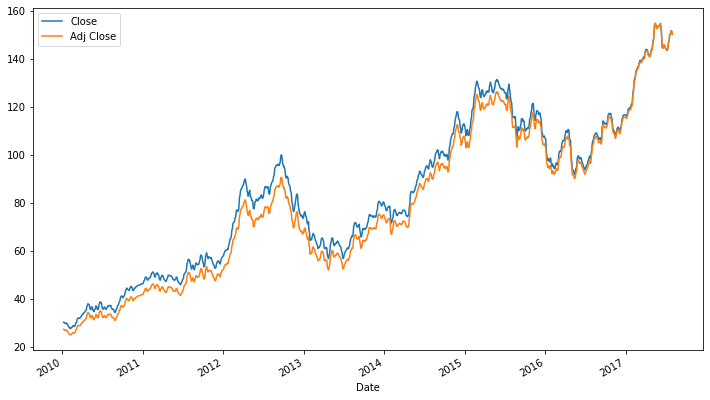

In [262]:
aapl.rolling(5)[['Close', 'Adj Close']].mean().plot();

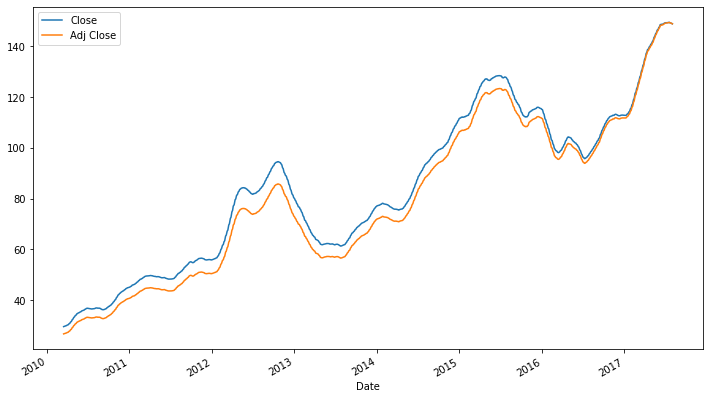

In [266]:
#ejemplo
aapl1.rolling(50)[['Close', 'Adj Close']].mean().plot();

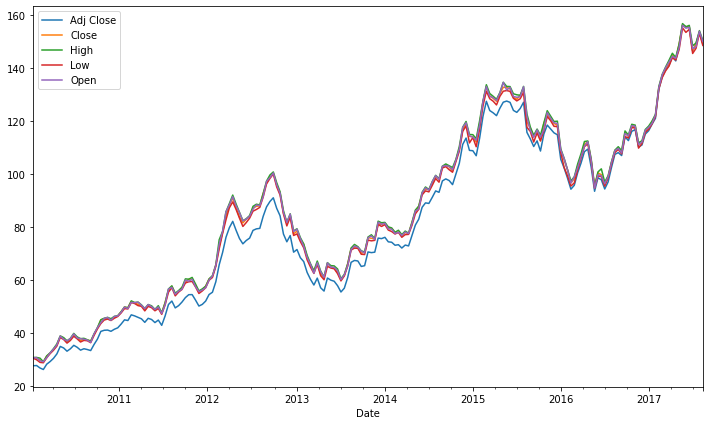

In [263]:
# Drop `Volume`, since it's way bigger than everything else.
aapl.drop('Volume', axis=1).resample('2W').max().plot();

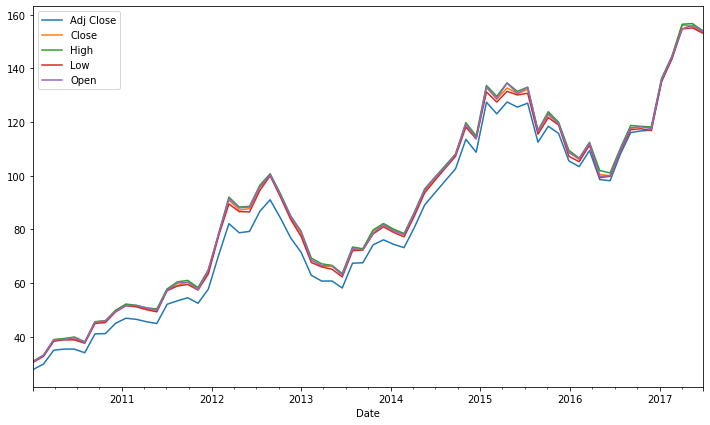

In [267]:
#ejemplo
aapl1.drop('Volume', axis=1).resample('42D').max().plot();

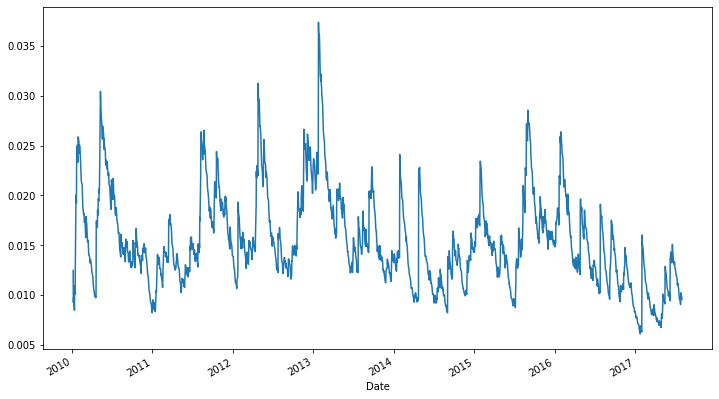

In [264]:
# 30-day rolling exponentially-weighted stddev of returns.
aapl['Close'].pct_change().ewm(span=30).std().plot();

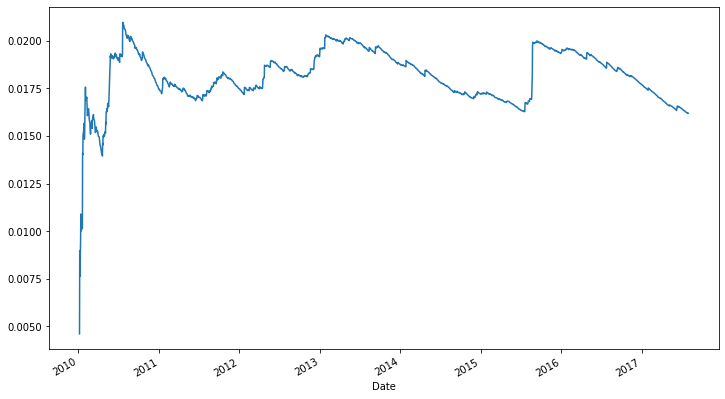

In [269]:
#ejemplo
aapl1['Open'].pct_change().ewm(span=999).std().plot();

# "Real World" Data

In [270]:
from demos.avocados import read_avocadata

avocados = read_avocadata('2014', '2016')
avocados.head()

,Date,Region,Variety,Organic,Number of Stores,Weighted Avg Price,Low Price,High Price
0,2014-01-03 00:00:00+00:00,NATIONAL,HASS,False,9184,0.93,NaN,NaN
1,2014-01-03 00:00:00+00:00,NATIONAL,HASS,True,872,1.44,NaN,NaN
2,2014-01-03 00:00:00+00:00,NORTHEAST,HASS,False,1449,1.08,0.5,1.67
3,2014-01-03 00:00:00+00:00,NORTHEAST,HASS,True,66,1.54,1.5,2.00
4,2014-01-03 00:00:00+00:00,SOUTHEAST,HASS,False,2286,0.98,0.5,1.99


Ejemplo con datos de
[Estadísticas de usuarios registrados en los servicios ciudadanos digitales](https://www.datos.gov.co/Ciencia-Tecnolog-a-e-Innovaci-n/Estad-sticas-de-usuarios-registrados-en-los-servic/bet5-rtqu)

In [284]:
#ejemplo
datosgov = pd.read_csv('Estad_sticas_de_usuarios_registrados_en_los_servicios_ciudadanos_digitales.csv', parse_dates=['Fecha'], index_col = 'Fecha')
datosgov.head()

,año,mes,Nivel garantía bajo,Nivel garantía medio,Nuevos Usuarios,Total Usuarios
Fecha,,,,,,
2021-02-10,2021,2,21,53,74,74
2021-02-11,2021,2,35,50,85,159
2021-02-12,2021,2,35,93,128,287
2021-02-13,2021,2,10,14,24,311
2021-02-14,2021,2,6,13,19,330


In [271]:
# Unlike numpy arrays, pandas DataFrames can have a different dtype for each column.
avocados.dtypes

Date                  datetime64[ns, UTC]
Region                             object
Variety                            object
Organic                              bool
Number of Stores                    int64
Weighted Avg Price                float64
Low Price                         float64
High Price                        float64
dtype: object

In [285]:
#ejemplo
datosgov.dtypes

año                     int64
mes                     int64
Nivel garantía bajo     int64
Nivel garantía medio    int64
Nuevos Usuarios         int64
Total Usuarios          int64
dtype: object

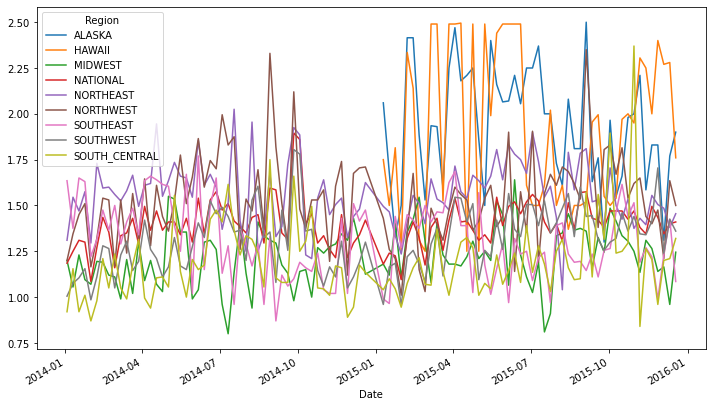

In [272]:
# What's the regional average price of a HASS avocado every day?
hass = avocados[avocados.Variety == 'HASS']
hass.groupby(['Date', 'Region'])['Weighted Avg Price'].mean().unstack().ffill().plot();

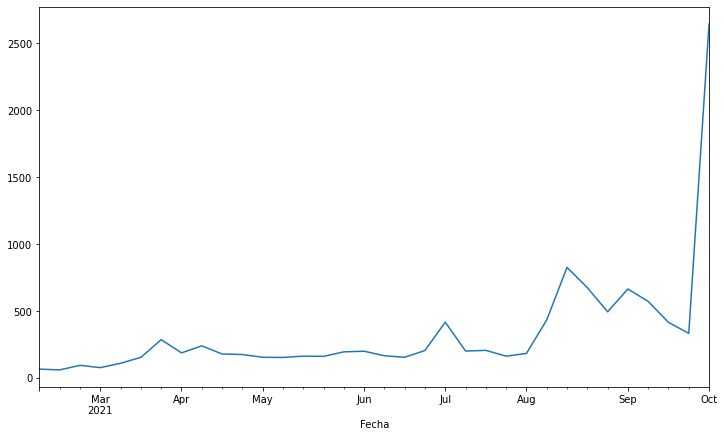

In [289]:
#ejemplo - promedio de usuarios nuevos por semana
datosgov['Nuevos Usuarios'].resample('W').mean().plot()

In [273]:
def _organic_spread(group):

    if len(group.columns) != 2:
        return pd.Series(index=group.index, data=0.0)
    
    is_organic = group.columns.get_level_values('Organic').values.astype(bool)
    organics = group.loc[:, is_organic].squeeze()
    non_organics = group.loc[:, ~is_organic].squeeze()
    diff = organics - non_organics
    return diff

def organic_spread_by_region(df):
    """What's the difference between the price of an organic 
    and non-organic avocado within each region?
    """
    return (
        df
        .set_index(['Date', 'Region', 'Organic'])
         ['Weighted Avg Price']
        .unstack(level=['Region', 'Organic'])
        .ffill()
        .groupby(level='Region', axis=1)
        .apply(_organic_spread)
    )

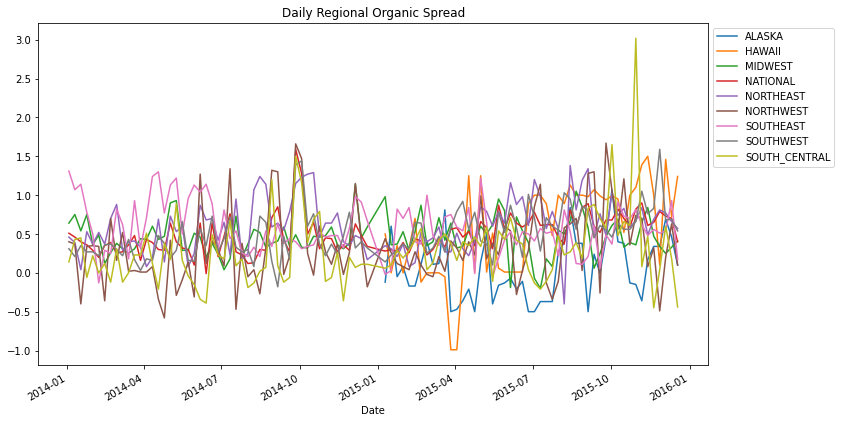

In [274]:
organic_spread_by_region(hass).plot();
plt.gca().set_title("Daily Regional Organic Spread");
plt.legend(bbox_to_anchor=(1, 1));

In [275]:
spread_correlation = organic_spread_by_region(hass).corr()
spread_correlation

Region,ALASKA,HAWAII,MIDWEST,NATIONAL,NORTHEAST,NORTHWEST,SOUTHEAST,SOUTHWEST,SOUTH_CENTRAL
Region,,,,,,,,,
ALASKA,1.000000,0.202723,0.175251,0.007844,0.051049,0.087575,0.129079,-0.070868,0.161624
HAWAII,0.202723,1.000000,-0.021116,0.373914,0.247171,0.341155,0.019388,0.159192,0.092632
MIDWEST,0.175251,-0.021116,1.000000,0.062595,-0.010213,-0.043783,0.047437,-0.059128,0.068902
NATIONAL,0.007844,0.373914,0.062595,1.000000,0.502035,0.579102,-0.040539,0.635006,0.486524
NORTHEAST,0.051049,0.247171,-0.010213,0.502035,1.000000,0.242039,-0.236225,0.360389,0.149881
NORTHWEST,0.087575,0.341155,-0.043783,0.579102,0.242039,1.000000,-0.032306,0.165992,0.349935
SOUTHEAST,0.129079,0.019388,0.047437,-0.040539,-0.236225,-0.032306,1.000000,-0.167631,-0.021176
SOUTHWEST,-0.070868,0.159192,-0.059128,0.635006,0.360389,0.165992,-0.167631,1.000000,0.254504
SOUTH_CENTRAL,0.161624,0.092632,0.068902,0.486524,0.149881,0.349935,-0.021176,0.254504,1.000000


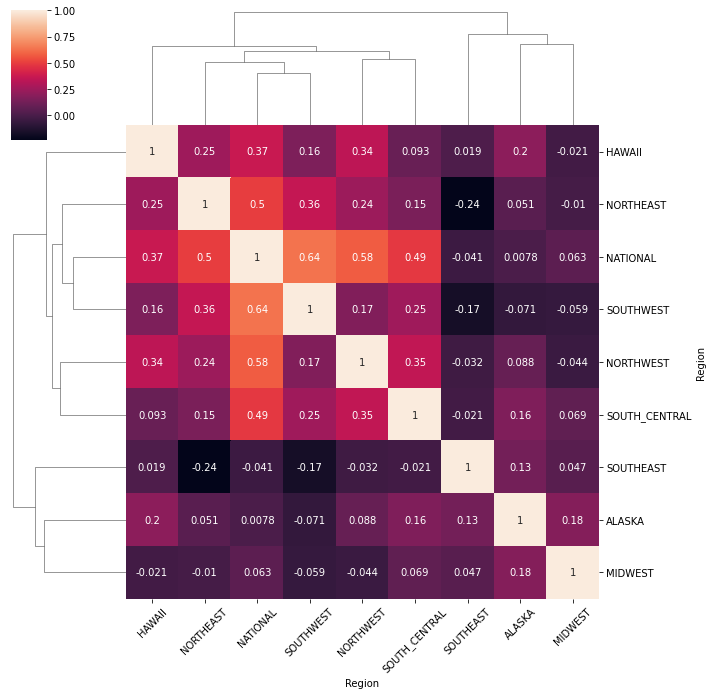

In [276]:
import seaborn as sns
grid = sns.clustermap(spread_correlation, annot=True)
fig = grid.fig
axes = fig.axes
ax = axes[2]
ax.set_xticklabels(ax.get_xticklabels(), rotation=45);

# Pandas Review

- Pandas extends numpy with more complex datastructures and algorithms.
- If you understand numpy, you understand 90% of pandas.
- `groupby`, `set_index`, and `unstack` are powerful tools for working with categorical data.
- Avocado prices are surprisingly interesting :)

# Thanks!